## Loaded dataset & added Person A / Person B

In [22]:
import pandas as pd
import numpy as np

Dataset = pd.read_csv("flirt_dataset.csv")

In [26]:
np.random.seed(42)  
Dataset["person"] = np.random.choice(["Person A", "Person B"], size = len(Dataset))

## Added timestamps (for day & time analysis)

In [27]:
start = pd.to_datetime("2025-01-01")
end   = pd.to_datetime("2025-03-31")

random_seconds = np.random.randint(start.value // 10**9, end.value   // 10**9, size=len(Dataset))

Dataset["timestamp"] = pd.to_datetime(random_seconds, unit="s")

Dataset["day_name"] = Dataset["timestamp"].dt.day_name()
Dataset["hour"]     = Dataset["timestamp"].dt.hour   # 0–23

## Media & missed-call flags

In [28]:
pattern_media = Dataset["text"].str.contains(r"(image omitted|video omitted|photo|media omitted|sticker)",case=False,regex=True)

random_media = np.random.rand(len(Dataset)) < 0.10

Dataset["is_media"] = pattern_media | random_media

Dataset["is_missed_call"] = Dataset["text"].str.contains(r"(missed voice call|missed video call|call cancelled)", case=False, regex=True)

C:\Users\Sai Vennela Jagadesh\AppData\Local\Temp\ipykernel_31488\4177832236.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  pattern_media = Dataset["text"].str.contains(r"(image omitted|video omitted|photo|media omitted|sticker)",case=False,regex=True)
C:\Users\Sai Vennela Jagadesh\AppData\Local\Temp\ipykernel_31488\4177832236.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  Dataset["is_missed_call"] = Dataset["text"].str.contains(r"(missed voice call|missed video call|call cancelled)", case=False, regex=True)


## 1️⃣ 📊Talkative vs Less Talkative

In [29]:
msg_counts = Dataset.groupby("person").size().sort_values(ascending=False)
print("Message count per person:\n", msg_counts, "\n")

print("Most talkative :", msg_counts.idxmax())
print("Less talkative :", msg_counts.idxmin())


Message count per person:
 person
Person B    201
Person A    199
dtype: int64 

Most talkative : Person B
Less talkative : Person A


<Axes: title={'center': 'Messages per Person'}, xlabel='person'>

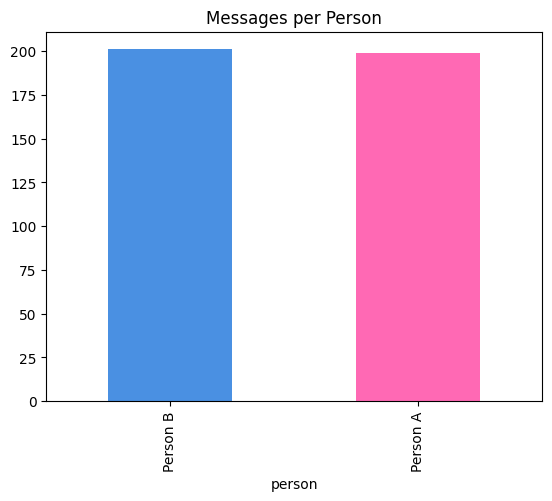

In [30]:
msg_counts.plot(kind = "bar",title = "Messages per Person",color = ["#4A90E2", "#FF69B4"])

## 2️⃣ 📊Most Active Day

In [31]:
day_counts = Dataset.groupby("day_name").size().sort_values(ascending = False)
print("Messages per day of week:\n", day_counts, "\n")
print("Most active day:", day_counts.idxmax())

Messages per day of week:
 day_name
Monday       67
Friday       65
Wednesday    65
Sunday       59
Thursday     56
Saturday     45
Tuesday      43
dtype: int64 

Most active day: Monday


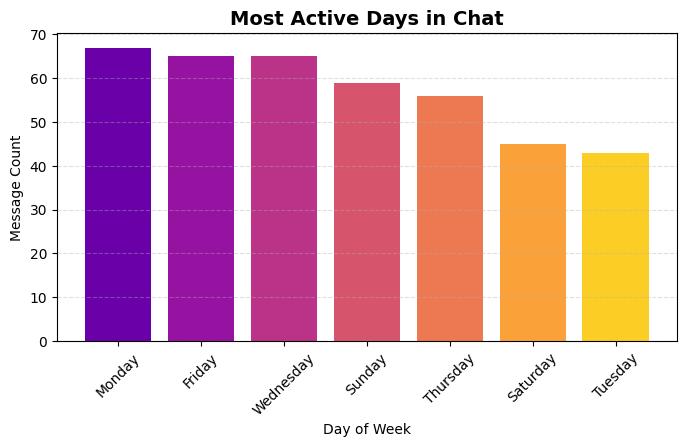

In [32]:
import matplotlib.pyplot as plt
import numpy as np

values = day_counts.values
labels = day_counts.index

plt.figure(figsize=(8,4))

colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(values)))

plt.bar(labels, values, color=colors)
plt.title("Most Active Days in Chat", fontsize=14, fontweight="bold")
plt.xlabel("Day of Week")
plt.ylabel("Message Count")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.show()


## 3️⃣ 📈Most Active Time

In [33]:
hour_counts = Dataset.groupby("hour").size().sort_values(ascending = False)
print("Messages per hour:\n", hour_counts, "\n")
print("Most active hour:", hour_counts.idxmax())

Messages per hour:
 hour
19    29
18    25
17    23
13    22
21    21
8     19
9     19
16    18
15    17
14    17
23    16
4     15
5     15
6     15
1     15
0     14
3     14
2     14
12    14
10    13
22    13
20    12
11    10
7     10
dtype: int64 

Most active hour: 19


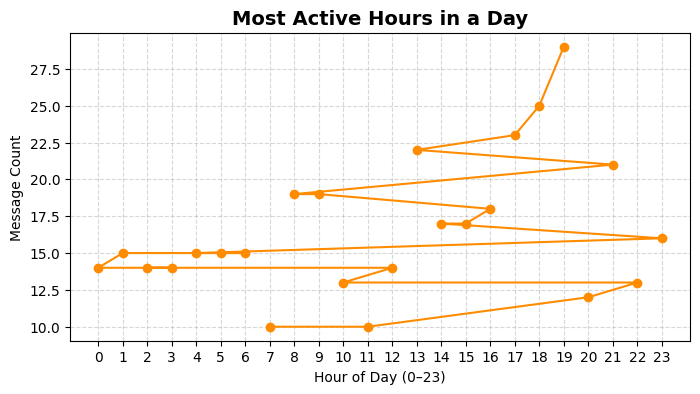

In [34]:
plt.figure(figsize=(8,4))
plt.plot(hour_counts.index, hour_counts.values, marker='o', color="#FF8C00")
plt.title("Most Active Hours in a Day", fontsize=14, fontweight="bold")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Message Count")
plt.grid(linestyle="--", alpha=0.5)
plt.xticks(range(0, 24))
plt.show()

## 4️⃣ 📊Media Count per Person

In [35]:
media_counts = Dataset[Dataset["is_media"]].groupby("person").size()
print("Media messages count per person:\n", media_counts)

Media messages count per person:
 person
Person A    17
Person B    23
dtype: int64


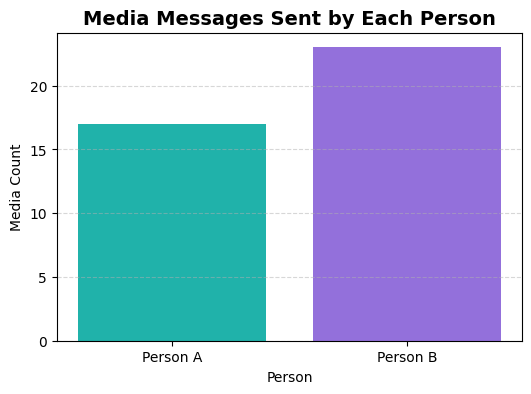

In [36]:
plt.figure(figsize=(6,4))
plt.bar(media_counts.index, media_counts.values, color=["#20B2AA", "#9370DB"])
plt.title("Media Messages Sent by Each Person", fontsize=14, fontweight="bold")
plt.xlabel("Person")
plt.ylabel("Media Count")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

## 5️⃣ Missed Calls — Count Summary

In [39]:
missed_calls = Dataset[Dataset["is_missed_call"]]

print("Total missed calls:", len(missed_calls), "\n")

if len(missed_calls) > 0:
    print(missed_calls[["timestamp", "person", "text"]].head())
else:
    print("No missed calls found in this dataset.")


Total missed calls: 0 

No missed calls found in this dataset.
